In [15]:
import pandas as pd
from sklearn.decomposition import PCA

dataset = pd.read_csv("D:/SEMESTER-5/Ekonemetrika Terapan/Project/Dataset/UCI_Credit_Card.csv/UCI_Credit_Card.csv")
dataset = dataset.drop(columns="ID",axis=1)
pca = PCA(n_components=2)  
reduced_X = pca.fit_transform(dataset)
print(reduced_X)

[[-166488.19108575  -75538.15366442]
 [-114226.97681662    9780.67125028]
 [ -98432.36218043  -33471.38733047]
 ...
 [-140206.12804818  -77857.49653986]
 [ -41427.74077382  -74908.30367213]
 [ -70860.31120894  -95514.14430966]]


In [16]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

y = dataset.iloc[:,-1]
X = dataset.iloc[:,:-1]

bestfeatures = SelectKBest(score_func=f_classif, k=5)  # Pilih 5 fitur terbaik
reduced_X = bestfeatures.fit_transform(X, y)
pd.DataFrame(reduced_X)


,0,1,2,3,4
0,2.0,2.0,-1.0,-1.0,-2.0
1,-1.0,2.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0
29996,-1.0,-1.0,-1.0,-1.0,0.0
29997,4.0,3.0,2.0,-1.0,0.0
29998,1.0,-1.0,0.0,0.0,0.0


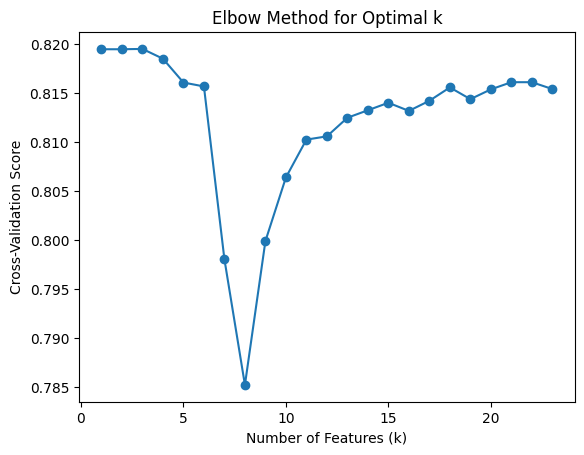

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

scores = []
k_values = range(1, X.shape[1] + 1)

for k in k_values:
    bestfeatures = SelectKBest(score_func=f_classif, k=k)
    X_new = bestfeatures.fit_transform(X, y)
    model = RandomForestClassifier()
    score = cross_val_score(model, X_new, y, cv=5).mean()
    scores.append(score)

# Plotting grafik elbow
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validation Score')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Latih model RandomForest
model = RandomForestClassifier()
model.fit(X, y)

# Ambil importance score dari fitur
importances = model.feature_importances_

# Urutkan berdasarkan importance dan ambil k terbaik
indices = np.argsort(importances)[::-1]

# Tampilkan importance dari setiap fitur
for i in range(X.shape[1]):
    print(f"Feature {i}: {X.columns[indices[i]]} (Importance: {importances[indices[i]]})")


Feature 0: PAY_0 (Importance: 0.09405108052397335)
Feature 1: AGE (Importance: 0.06689510495330675)
Feature 2: BILL_AMT1 (Importance: 0.06033517493867943)
Feature 3: LIMIT_BAL (Importance: 0.05965389091040763)
Feature 4: BILL_AMT2 (Importance: 0.054896886900715106)
Feature 5: BILL_AMT3 (Importance: 0.052610149694965906)
Feature 6: BILL_AMT5 (Importance: 0.050813912888327435)
Feature 7: PAY_AMT1 (Importance: 0.050811260315307784)
Feature 8: BILL_AMT6 (Importance: 0.05041196929712695)
Feature 9: BILL_AMT4 (Importance: 0.04987343158357448)
Feature 10: PAY_AMT2 (Importance: 0.047851036386648796)
Feature 11: PAY_AMT3 (Importance: 0.04581347131270517)
Feature 12: PAY_AMT6 (Importance: 0.045316873199689744)
Feature 13: PAY_2 (Importance: 0.04473903839645591)
Feature 14: PAY_AMT5 (Importance: 0.043649822824481765)
Feature 15: PAY_AMT4 (Importance: 0.04311097150973216)
Feature 16: PAY_3 (Importance: 0.030128335904868204)
Feature 17: PAY_4 (Importance: 0.023371136362171762)
Feature 18: PAY_5 (Im